## Fake news detection

### Data preprocessing

This is the data preprocessing step. We have found the data from this [source](https://github.com/MenbereHailu/Amharic_Fake_News_Detection_On_Social_Media-_Using_Pretrained-_Language_Model/blob/main/Merged%20_Fakenews_Data.xlsx). In this step, regex has been used to remove english words and numbers, special characters , emojis, geez letters and normalized Amharic letters wit similar phonology but different symbols. Finally, the labels were one-hot encoded.

Membere Hailu, "Amhairc fake news detection on social media using pretrained language model", 2022.


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
import sys

# fix issues with importing modules from directories not inside /notebooks
sys.path.append("..")

In [32]:
from pathlib import Path
import pandas as pd
import importlib
import sys
import os
import re

src_parent = Path('/content/drive/MyDrive/data_collectioin/fake_news_detection')
sys.path.append(str(src_parent))

# Check the type and contents of the src path
src = src_parent / "src"
print(type(src))
print(os.listdir(src))

import src.preprocess
from src.preprocess import Preprocess

preprocess = Preprocess()


# Paths for data processing
processed_data_path = "/content/drive/MyDrive/data_collectioin/fake_news_detection/data/processed"
raw_data_path = "/content/drive/MyDrive/data_collectioin/fake_news_detection/data/raw"
unprocessed_dataset_path = raw_data_path + "/data.xlsx"

# Load the unprocessed data
unprocessed_df = pd.read_excel(unprocessed_dataset_path)
print(unprocessed_df)


<class 'pathlib.PosixPath'>
['__init__.py', '__pycache__', 'preprocess.py']
                                            Actual_Post Label
0     መንግስት ከልምድ ተመሮ ምንም ጥቅምና አትኩሮት የሌለውን መግለጫ በመግለጫ...  Fake
1     ወይ ጉድ! ስለ ዜግነት በቅጡ ሳይረዱ ዜግነት ሰጪና ከልካይ የፖለቲካ መሪ...  Fake
2     አብሮነት በመከባበር ላይ የተመሰረተ መሆን አለበት። ኦሮሚያ ውስጥ የምትኖ...  Fake
3     እንኳን አሁን ወያኔም እያለ የህዝቦች ሁሉ ጠላት ነፍጠኛዉ ነው ብዬ ነበር...  Fake
4     እንደዚህ እንደዚያ የሚያረጉን "ኃይሎች" እያሉ መንግስት ነን ባዮች ችግሮ...  Fake
...                                                 ...   ...
8626  ዌስት ማቲውሰን ይባላሉ። እውቅ የአካባቢ ተንከባካቢ ነበሩ። በተለይም ከደ...  Real
8627  ሰርቫይቫል ኢንተርናሽናል የተባለ ተቋም በ1850ዎቹ ብሪታኒያ ሕንድን ስት...  Real
8628  ፓርቲዎቹ የመጀመሪያውን የምርጫ ክርክር በመገናኛ ብዙሃን በተላለፈ የቀጥታ...  Real
8629  በፍርድ ሂደቱ የመጀመሪያዎቹ ሦስት ቀናት ጉዳት የደረሰባቸው ሰዎች ምስክር...  Real
8630    በመተሐራ በተደጋጋሚ እየተከሰተ ያለው መሬት መንቀጥቀጥ ነዋሪዎችን አሳስቧል  Real

[8631 rows x 2 columns]


In [33]:
# data profiling before preprocessing
preprocess.data_profile(unprocessed_df,"Actual_Post")

{'URLs': 1294,
 'English words/digits': 135414,
 'Amharic Geez numbers': 24,
 'Special characters/punctuation': 205193,
 'Emojis': 1686,
 'Extra spaces': 17345,
 'HTML tags': 110,
 'Elongated words': 11193,
 'Leading/trailing spaces': 150}

In [34]:
processed_data_dict = {
    "Post": [],
    "Label": [],
}
processed_dataset_path = processed_data_path + "/processed_data.csv"
# i = 1

for index, row in unprocessed_df.iterrows():
    # if i == 1:
    #     print(row)
    #     i += 1
    first_column = preprocess.preprocess_data(text=row.iloc[0])
    second_column = 1 if row.iloc[1] == 'Real' else 0

    processed_data_dict["Post"].append(first_column)
    processed_data_dict["Label"].append(second_column)

df = pd.DataFrame(processed_data_dict)
print(df)
df.to_csv(processed_dataset_path, index=False)
pd.read_csv(processed_dataset_path)
processed_dataset_path

                                                   Post  Label
0     መንግስት ከልምድ ተመሮ ምንም ጥቅምና አትኩሮት የሌለውን መግለጫ በመግለጫ...      0
1     ወይ ጉድ ስለ ዜግነት በቅጡ ሳይረዱ ዜግነት ሰጪና ከልካይ የፖለቲካ መሪ ...      0
2     አብሮነት በመከባበር ላይ የተመሰረተ መሆን አለበት ኦሮሚያ ውስጥ የምትኖሩ...      0
3     እንኳን አሁን ወያኔም እያለ የህዝቦች ሁሉ ጠላት ነፍጠኛዉ ነው ብዬ ነበር...      0
4     እንደዚህ እንደዚያ የሚያረጉን ሀይሎች እያሉ መንግስት ነን ባዮች ችግሮችን...      0
...                                                 ...    ...
8626  ዌስት ማቲውሰን ይባላሉ እውቅ የአካባቢ ተንከባካቢ ነበሩ በተለይም ከደቦሎ...      1
8627  ሰርቫይቫል ኢንተርናሽናል የተባለ ተቋም በዎቹ ብሪታኒያ ህንድን ስትወር የ...      1
8628  ፓርቲዎቹ የመጀመሪያውን የምርጫ ክርክር በመገናኛ ብዙሀን በተላለፈ የቀጥታ...      1
8629  በፍርድ ሂደቱ የመጀመሪያዎቹ ሶስት ቀናት ጉዳት የደረሰባቸው ሰዎች ምስክር...      1
8630    በመተሀራ በተደጋጋሚ እየተከሰተ ያለው መሬት መንቀጥቀጥ ነዋሪዎችን አሳስቧል      1

[8631 rows x 2 columns]


'/content/drive/MyDrive/data_collectioin/fake_news_detection/data/processed/processed_data.csv'

In [35]:
#Data profiling after preprocessing ####
preprocess.data_profile(df,"Post")

{'URLs': 0,
 'English words/digits': 0,
 'Amharic Geez numbers': 0,
 'Special characters/punctuation': 0,
 'Emojis': 0,
 'Extra spaces': 0,
 'HTML tags': 0,
 'Elongated words': 0,
 'Leading/trailing spaces': 0}

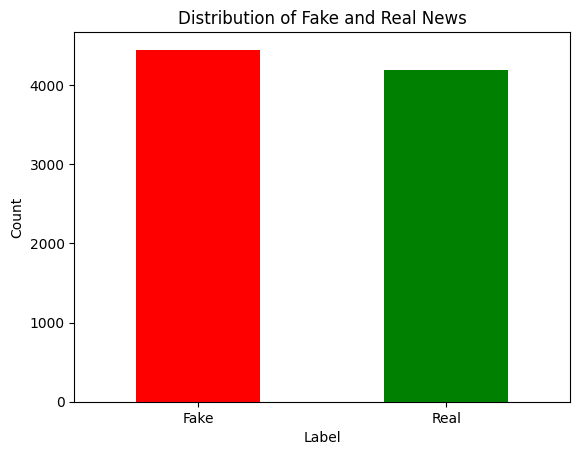

In [36]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Plot the counts
label_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'], rotation=0)
plt.show()

In [37]:
X = df["Post"]
y = df["Label"]
X.head(), y.head()

(0    መንግስት ከልምድ ተመሮ ምንም ጥቅምና አትኩሮት የሌለውን መግለጫ በመግለጫ...
 1    ወይ ጉድ ስለ ዜግነት በቅጡ ሳይረዱ ዜግነት ሰጪና ከልካይ የፖለቲካ መሪ ...
 2    አብሮነት በመከባበር ላይ የተመሰረተ መሆን አለበት ኦሮሚያ ውስጥ የምትኖሩ...
 3    እንኳን አሁን ወያኔም እያለ የህዝቦች ሁሉ ጠላት ነፍጠኛዉ ነው ብዬ ነበር...
 4    እንደዚህ እንደዚያ የሚያረጉን ሀይሎች እያሉ መንግስት ነን ባዮች ችግሮችን...
 Name: Post, dtype: object,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Label, dtype: int64)

## **Splitting the dataset**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6904,), (1727,), (6904,), (1727,))

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
XV_train = vectorizer.fit_transform(X_train)
XV_test = vectorizer.transform(X_test)

# **Classical Model Training Using Different Classical models**

 ## **Logistic Regression**


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LR = LogisticRegression()
LR.fit(XV_train, y_train)

LogisticRegression()

In [41]:
lr_prediction = LR.predict(XV_test)
print("Accuracy: ", LR.score(XV_test, y_test))
print("Classification Report: " , classification_report(y_test, lr_prediction))

Accuracy:  0.9351476548928779
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.94      0.93       855
           1       0.94      0.93      0.94       872

    accuracy                           0.94      1727
   macro avg       0.94      0.94      0.94      1727
weighted avg       0.94      0.94      0.94      1727



### **DecisionTree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(XV_train, y_train)

DecisionTreeClassifier()

In [43]:
ds_prediction = DT.predict(XV_test)
print("Accuracy: ", DT.score(XV_test, y_test))
print("Classification Report: " , classification_report(y_test, ds_prediction))

Accuracy:  0.8760856977417487
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.87      0.87       855
           1       0.88      0.88      0.88       872

    accuracy                           0.88      1727
   macro avg       0.88      0.88      0.88      1727
weighted avg       0.88      0.88      0.88      1727



### **Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

RF = RandomForestClassifier()
RF.fit(XV_train, y_train)

RandomForestClassifier()

In [45]:
rf_prediction = RF.predict(XV_test)
print("Accuracy: ", RF.score(XV_test, y_test))
print("Classification Report: " , classification_report(y_test, rf_prediction))

Accuracy:  0.9148812970469021
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.92      0.91       855
           1       0.92      0.91      0.92       872

    accuracy                           0.91      1727
   macro avg       0.91      0.91      0.91      1727
weighted avg       0.91      0.91      0.91      1727



### **Gradient Boosting**

In [46]:
GB = GradientBoostingClassifier()
GB.fit(XV_train, y_train)

GradientBoostingClassifier()

In [47]:
gb_prediction = GB.predict(XV_test)
print("Accuracy: ", GB.score(XV_test, y_test))
print("Classification Report: " , classification_report(y_test, gb_prediction))

Accuracy:  0.8922987840185292
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.93      0.90       855
           1       0.93      0.85      0.89       872

    accuracy                           0.89      1727
   macro avg       0.89      0.89      0.89      1727
weighted avg       0.90      0.89      0.89      1727



def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [48]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

In [49]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_data_test = pd.DataFrame(testing_news)
    new_data_test["text"] = new_data_test["text"].apply(preprocess.preprocess_data)
    new_x_test = new_data_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    LR_prediction = LR.predict(new_xv_test)
    DT_prediction = DT.predict(new_xv_test)
    RF_prediction = RF.predict(new_xv_test)
    GB_prediction = GB.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction {} \nGBC Prediction {} \nRFC Prediction {}".format(output_lable(LR_prediction), output_lable(DT_prediction), output_lable(GB_prediction), output_lable(RF_prediction)))


In [50]:
news = str(input())
manual_testing(news)

hj


LR Prediction: Fake News 
DT Prediction Fake News 
GBC Prediction Fake News 
RFC Prediction Fake News


# **Using fine-tuned pretrained XLM-RoBERTa Model**

In [51]:
!pip3 install datasets


In [52]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import pandas as pd

# Assume df is your DataFrame with "Post" (text) and "Label" (target)
# X = df["Post"]
# y = df["Label"]

# Step 1: Split dataset into train, validation, and test sets
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df["Post"], df["Label"], test_size=0.4, random_state=42, stratify=df["Label"]
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

# Step 2: Convert splits to Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts, "label": train_labels})
val_data = Dataset.from_dict({"text": val_texts, "label": val_labels})
test_data = Dataset.from_dict({"text": test_texts, "label": test_labels})

dataset = DatasetDict({
    "train": train_data,
    "validation": val_data,
    "test": test_data
})

# Step 3: Load tokenizer and model
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
# Step 4: Tokenize the dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/5178 [00:00<?, ? examples/s]

Map:   0%|          | 0/1726 [00:00<?, ? examples/s]

Map:   0%|          | 0/1727 [00:00<?, ? examples/s]

In [54]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="none",
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [58]:
# Step 6: Define metrics for evaluation
def compute_metrics(pred):
    predictions = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [64]:
# Step 7: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Step 8: Train the model
trainer.train()

<ipython-input-64-e95a51e62098>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.097900,0.236477,0.949015,0.929260,0.975253,0.951701
2,0.145900,0.322366,0.928737,0.884538,0.991001,0.934748
3,0.076800,0.231286,0.956547,0.939525,0.978628,0.958678


TrainOutput(global_step=972, training_loss=0.09535779348678058, metrics={'train_runtime': 1935.4568, 'train_samples_per_second': 8.026, 'train_steps_per_second': 0.502, 'total_flos': 4087167133962240.0, 'train_loss': 0.09535779348678058, 'epoch': 3.0})

In [66]:
# Step 9: Evaluate the model on the test set
test_results = trainer.evaluate(tokenized_dataset["test"])
print("Test Results:", test_results)

# Step 10: Save the model and tokenizer
model.save_pretrained("./amharic_fake_news_model")
tokenizer.save_pretrained("./amharic_fake_news_model")

Test Results: {'eval_loss': 0.2797089219093323, 'eval_accuracy': 0.9496236247828604, 'eval_precision': 0.9213011542497377, 'eval_recall': 0.9865168539325843, 'eval_f1': 0.9527943570265871, 'eval_runtime': 51.1718, 'eval_samples_per_second': 33.749, 'eval_steps_per_second': 2.111, 'epoch': 3.0}


('./amharic_fake_news_model/tokenizer_config.json',
 './amharic_fake_news_model/special_tokens_map.json',
 './amharic_fake_news_model/sentencepiece.bpe.model',
 './amharic_fake_news_model/added_tokens.json',
 './amharic_fake_news_model/tokenizer.json')

In [71]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "./amharic_fake_news_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

def predict_news(news_text):
    inputs = tokenizer(
        news_text,
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

    # Put the model in evaluation mode
    model.eval()

    # Perform the prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    # Map prediction to label
    label_map = {0: "Fake", 1: "Real"}
    return label_map[predicted_class]


sample_news = "ኢትና ላነት መደጸች"
prediction = predict_news(sample_news)
print(f"The news is predicted to be: {prediction}")


The news is predicted to be: Fake
